## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_study["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# duplicate = mouse_study[mouse_study.duplicated()]
mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study[mouse_study['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = mouse_study[mouse_study['Mouse ID']!='g989']
clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
clean["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grp = clean.groupby('Drug Regimen')['Tumor Volume (mm3)']
pd.DataFrame({'mean':grp.mean(),'median':grp.median(),'var':grp.var(),'std':grp.std(),'sem':grp.sem()})

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
grp.agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

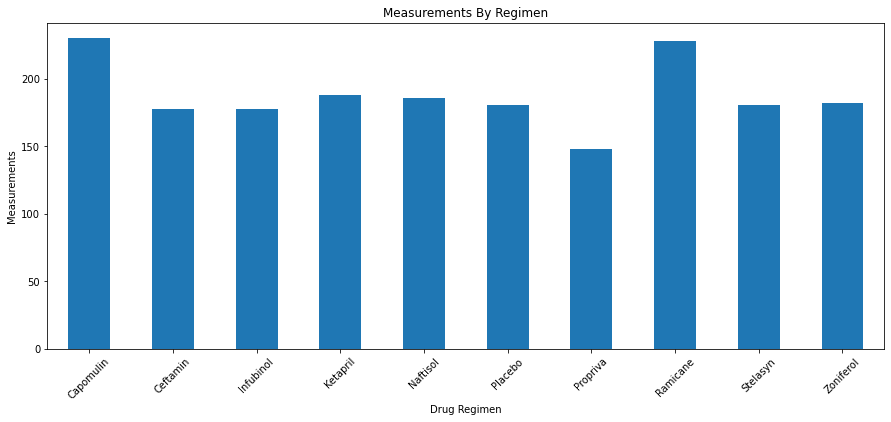

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

measurements = clean.groupby('Drug Regimen').Timepoint.count()
measurements.plot.bar(rot=45,figsize=(15,6),title='Measurements By Regimen',ylabel='Measurements')
plt.show()

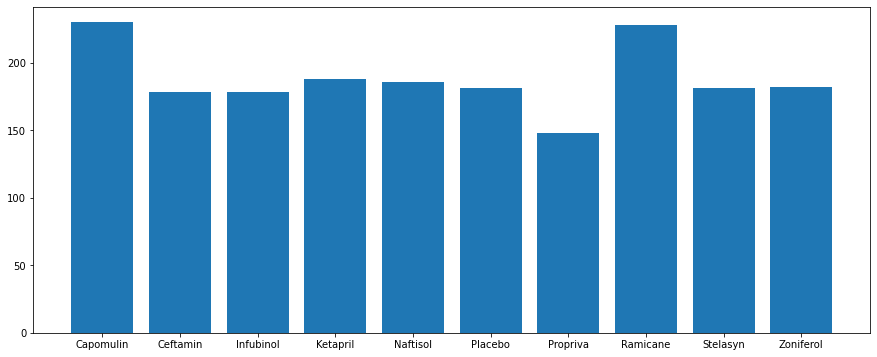

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.figure(figsize=[15,6])
plt.bar(measurements.index, measurements.values)
#plt.ylabel('Measurements')
# plt.xlabel('Drug Regimen')
# plt.title('Measurements By Regimen')
plt.show()

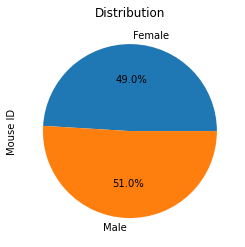

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_groups = clean.groupby("Sex")

gender_count = gender_groups["Mouse ID"].count()

gender_pie = gender_count.plot(kind="pie", y= "Mouse ID", title= "Distribution", autopct='%1.1f%%')
gender_pie.set_ylabel("Mouse ID")

plt.show()


In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mice_max = clean.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mice_max_combined = pd.merge(mice_max, clean, on =("Mouse ID", "Timepoint"), how = "inner")
mice_max_combined

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [24]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
results_dict = {"Capomulin": None, "Ramicane": None, "Infubinol": None, "Ceftamin": None}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in results_dict: 
    print(regimen)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    t_volumes = mice_max_combined.loc[mice_max_combined["Drug Regimen"] == regimen,"Tumor Volume (mm3)"]
    #print(type(t_volumes), t_volumes)
    quartiles = t_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    mean = quartiles[0.5]
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    results_dict[regimen] = t_volumes
    
    print()
    
    
    

Capomulin
{'Capomulin': 19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64, 'Ramicane': None, 'Infubinol': None, 'Ceftamin': None}
Ramicane
{'Capomulin': 19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: 

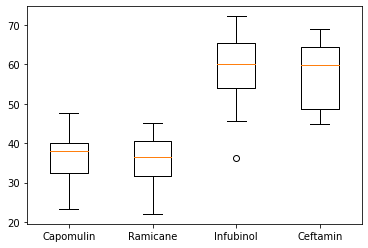

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
volume_list = [v for k, v in results_dict.items()]

volfig = plt.figure().subplots()

volfig.boxplot(volume_list, labels=results_dict.keys())

plt.show()


## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mice=clean.loc[clean["Drug Regimen"] == 'Capomulin']

mouse = capomulin_mice.loc[capomulin_mice["Mouse ID"] == 'x401']

mouse.head(20)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0
25,x401,Capomulin,Female,16,15,25,36.617120,0
26,x401,Capomulin,Female,16,15,30,32.915292,0
27,x401,Capomulin,Female,16,15,35,30.206825,0
28,x401,Capomulin,Female,16,15,40,28.167397,0
29,x401,Capomulin,Female,16,15,45,28.484033,0


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
.plot(kind="scatter", x = "Weight(g)", y = "Tumor Volume(mm3)", title ="Average Tumor Volume vs Mouse Weight")

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
